In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras import Sequential
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Reshape, InputLayer, Dropout
import tensorflow as tf

%matplotlib inline

def read_bed(filename):
    return pd.read_csv(filename, sep='\t', header=None)


def to_bed(data, filename):
    data.to_csv(filename, sep='\t', header=None, index=None)

N = 100
chr_name = 'chr10'
histones = ['E003-H3K4me1', 'E003-H3K4me3', 'E003-H3K9me3', 'E003-H3K27me3', 'E003-H3K36me3']
h = histones[0]
path_to_data = ''

Using TensorFlow backend.


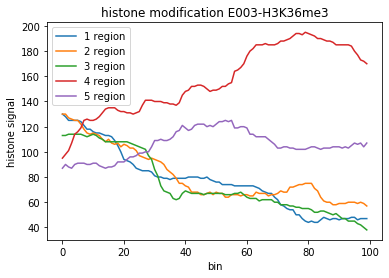

In [32]:
data_0 = read_bed('{}/plus_{}_{}_random_low.peaks'.format(chr_name, chr_name, histones[0]))
for i in range(5):
    plt.plot(range(100), data_0.iloc[i * 100 : (i + 1) * 100, 3], label='{} region'.format(i + 1))
plt.xlabel('bin')
plt.ylabel('histone signal')
plt.title('histone modification {}'.format(h))
plt.legend()
plt.savefig('peaks.jpg')
plt.show()

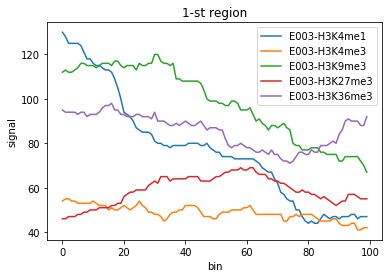

In [28]:
i = 0
for h in histones:
    plt.plot(
        range(100),
        read_bed('{}/plus_{}_{}_random_low.peaks'.format(chr_name, chr_name, h)).iloc[i * 100 : (i + 1) * 100, 3],
        label=h
    )
plt.title('1-st region')
plt.legend()
plt.xlabel('bin')
plt.ylabel('signal')
plt.savefig('histones.jpg')
plt.show()

In [4]:
regions_num = np.array([
    read_bed('{}/plus_{}_{}.peaks'.format(chr_name, chr_name, h)).shape[0] // 100,
    read_bed('{}/plus_{}_{}_random_low.peaks'.format(chr_name, chr_name, h)).shape[0] // 100
])


X_p = np.zeros((regions_num[0], len(histones), N))
X_m = np.zeros((regions_num[1], len(histones), N))
for i in range(len(histones)):
    h = histones[i]
    X_p[:, i, :] = np.array(read_bed('{}/plus_{}_{}.peaks'.format(chr_name, chr_name, h))[3]).reshape(regions_num[0], N)
    X_m[:, i, :] = np.array(read_bed('{}/plus_{}_{}_random_low.peaks'.format(chr_name, chr_name, h))[3]).reshape(regions_num[1], N)


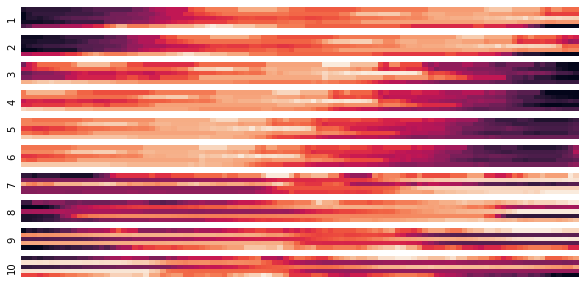

In [46]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(10, 1, i + 1)
    sns.heatmap(
        (X_p[i] - X_p[i].mean(axis=1).repeat(100).reshape(5, 100)) / X_p[i].std(axis=1).repeat(100).reshape(5, 100),
        vmin=-2.4,
        vmax=1.6,
        cbar=False,
        xticklabels=False,
        yticklabels=False
    )
    plt.ylabel(i + 1)
    plt.ylim(-0.5, 5)
plt.savefig('images.jpg')

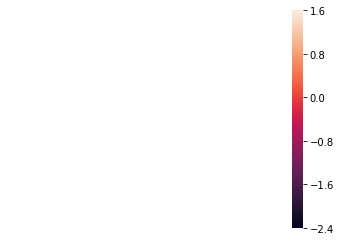

In [55]:
sns.heatmap(
    np.zeros((0, 0)),
    vmin=-2.4,
    vmax=1.6,
)
plt.savefig('color_bar.jpg')

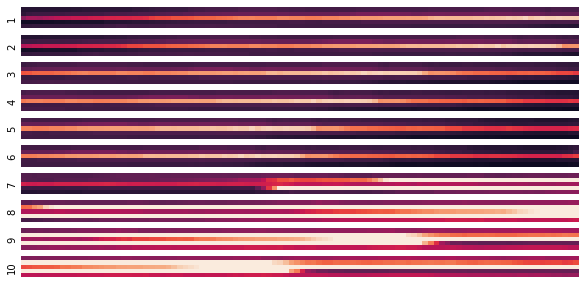

In [56]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(10, 1, i + 1)
    sns.heatmap(
        X_p[i],
        vmin=0,
        vmax=200,
        cbar=False,
        xticklabels=False,
        yticklabels=False
    )
    plt.ylabel(i + 1)
    plt.ylim(-0.5, 5)
plt.savefig('images_orig.jpg')

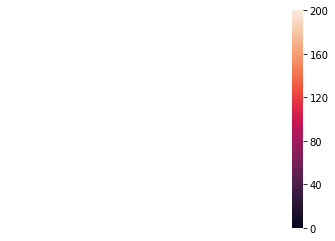

In [57]:
sns.heatmap(
    np.zeros((0, 0)),
    vmin=0,
    vmax=200,
)
plt.savefig('color_bar_orig.jpg')

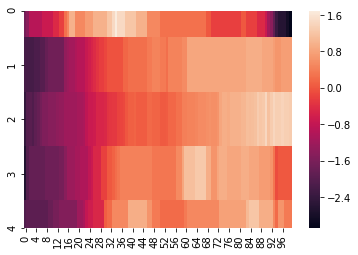

In [45]:
sns.heatmap(
    (X_p[0] - X_p[0].mean(axis=1).repeat(100).reshape(5, 100)) / X_p[0].std(axis=1).repeat(100).reshape(5, 100)
)

In [20]:
print(
    *list(map(
        lambda x: str(x).replace('.', ','),
        np.random.normal(0.80, 0.01, (25))
    )),
    sep='\n'
)

0,7883110509152786
0,8007057638266367
0,8006625900357593
0,8029864121747964
0,792370325906282
0,8046496632492429
0,7871325318624746
0,8073275722595401
0,8113549102691313
0,8033722425442635
0,7857193354267061
0,8039619324872007
0,8038361335564599
0,7941910176413174
0,8074992485867185
0,8107342809543009
0,8222684513595064
0,8015242587850064
0,7998171186854193
0,8052603198684242
0,7836778316304113
0,8036046638554459
0,8014252481522757
0,8025701630123118
0,7975988248623292


In [11]:
print(*read_bed('../plus.bed'.format(chr_name, chr_name, h))[0].unique(), sep='\n')

chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr1
chr20
chr21
chr22
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chrX
chrY
chrM
